In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable
from matplotlib.patches import Patch  # Per creare elementi di legenda personalizzati

In [10]:
def plot_boxplot(data_for, data_parallel_for, data_openmp, title):
    fig, ax = plt.subplots(figsize=[10, 8])

    boxs = []
    ticks = []
    colors = []

    # Primo box: versione sequenziale
    boxs.append(data_for)
    ticks.append("for")
    colors.append("orange")

    # Aggiungi coppie (parallel_for, openmp) per ogni numero di thread
    for i in range(len(data_parallel_for)):
        boxs.append(data_parallel_for[i])
        boxs.append(data_openmp[i])
        # Etichette duplicate, ma le rendiamo visivamente chiare
        ticks.append(f"{n_threads[i]}")  
        ticks.append(f"{n_threads[i]}")  
        colors.extend(["skyblue", "lightgreen"])

    # Crea il boxplot
    bplot = ax.boxplot(boxs, showfliers=False, patch_artist=True)

    # Applica colori ai box
    for box, color in zip(bplot['boxes'], colors):
        box.set_facecolor(color)

    # Etichette e titolo
    ax.set_xlabel('Threads')
    ax.set_ylabel('Microseconds')
    ax.set_title(title, loc='left')
    ax.set_xticks(range(1, len(boxs) + 1))
    ax.set_xticklabels(ticks, rotation=30)
    ax.set_yscale('log')

    # Legenda
    legend_handles = [
        Patch(facecolor='orange', label='for (sequential)'),
        Patch(facecolor='skyblue', label='parallel_for'),
        Patch(facecolor='lightgreen', label='OpenMP')
    ]
    ax.legend(handles=legend_handles, loc='upper right')

    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nmatrix size: {n_size}x{n_size}\ngranularity: {granularity}\nruns:{len(dati_parallel[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Calcolo e stampa delle mediane ---
    medians = [np.median(d) for d in boxs]
    print("\n=== BOX PLOT MEDIANS ===")
    print(f"{'Label':<15} | {'Median (µs)':>12}")
    print("-" * 30)

    print(f"{'for':<15} | {medians[0]:>12.2f}")
    idx = 1
    for i in range(len(data_parallel_for)):
        print(f"parallel_for (th={n_threads[i]}): {medians[idx]:>10.2f} µs")
        print(f"OpenMP       (th={n_threads[i]}): {medians[idx+1]:>10.2f} µs")
        idx += 2
    print("=" * 30 + "\n")

In [11]:
def plot_speedup(dati_parallel,dati_openmp,title,threads): #primo data in data_list è for normale e poi si compara con quello
    fig, ax = plt.subplots(figsize=[16, 8])

    parallel_median = [np.median(datum) for datum in dati_parallel]
    speedup_parallel = np.zeros(len(threads))

    openmp_median = [np.median(datum) for datum in dati_openmp]
    speedup_openmp = np.zeros(len(threads))


    for i in range(len(threads)):
        speedup_parallel[i] = parallel_median[0]/parallel_median[i+1]
        speedup_openmp[i] = openmp_median[0]/openmp_median[i+1]

    ax.plot(threads,speedup_parallel,'o--')
    ax.plot(threads,speedup_openmp,'x--')

    ax.legend(['speedup_threadpool','speedup_OpenMP'])
    ax.set_title(title, loc= 'left')
    ax.set_xticks(threads)
    ax.set_xticklabels(threads, rotation = 45)


    ax.set(xlabel = 'Threads',ylabel = 'speedup')
    plt.figtext(0.7, 0.9, f"threadpool: size_queue({size_queue})\nmatrix size: {n_size}x{n_size}\ngranularity: {granularity}\nruns:{len(dati_parallel[0])}", fontsize=9, 
            bbox=dict(facecolor='white', edgecolor='black'))
    
    # --- Stampa speedup ---
    print("\n=== SPEEDUP VALUES ===")
    for i, t in enumerate(threads):
        print(f"{t} threads -> threadpool: {speedup_parallel[i]:.2f} | OpenMP: {speedup_openmp[i]:.2f}")
    print("=======================\n")

## prestazioni parallel_for al variare di granularity

In [9]:
!rm *.txt

rm: cannot remove '*.txt': No such file or directory


In [4]:
#set parameter
n_runs = 50
n_size = 3000 #costo singola iterazione
n_threads = [1,2,3,4,5,6,7,8]
size_queue = 256
granularity = -1

In [11]:
#run manualmente for seq,   nruns sizematrix
!./for.sh 10 3000

In [87]:
#run granularity for (per ogni thread un run di .sh) runs sizematrix thread queuesize granularity
!./parallel_for.sh 10 3000 3 256 -1

In [52]:
# per run for open mp (n_thread uno per volta)  nruns size nthread
!./for_openmp.sh 10 3000 8

In [14]:
# run test granularity
dati_for = []
dati_for = np.genfromtxt("test_for_matrix.txt",delimiter=',',dtype=int)[:-1]
dati_parallel = []
for i,nb in enumerate(n_threads):
    dati_parallel.append(np.genfromtxt("test_parallel_for_matrix_th"+str(nb)+".txt",delimiter=',',dtype=int)[:-1])

In [15]:
# run test granularity
dati_for = []
dati_for = np.genfromtxt("test_for_matrix.txt",delimiter=',',dtype=int)[:-1]
dati_for_open = []
for i,nb in enumerate(n_threads):
    dati_for_open.append(np.genfromtxt("test_for_openmp_th"+str(nb)+".txt",delimiter=',',dtype=int)[:-1])


=== BOX PLOT MEDIANS ===
Label           |  Median (µs)
------------------------------
for             |     96586.50
parallel_for (th=1):  103549.00 µs
OpenMP       (th=1):  105789.00 µs
parallel_for (th=2):   55992.00 µs
OpenMP       (th=2):   58539.00 µs
parallel_for (th=3):   40273.00 µs
OpenMP       (th=3):   41705.50 µs
parallel_for (th=4):   47531.00 µs
OpenMP       (th=4):   49077.00 µs
parallel_for (th=5):   44212.00 µs
OpenMP       (th=5):   42607.50 µs
parallel_for (th=6):   38179.50 µs
OpenMP       (th=6):   38109.50 µs
parallel_for (th=7):   33288.00 µs
OpenMP       (th=7):   35071.50 µs
parallel_for (th=8):   42669.00 µs
OpenMP       (th=8):   33952.00 µs



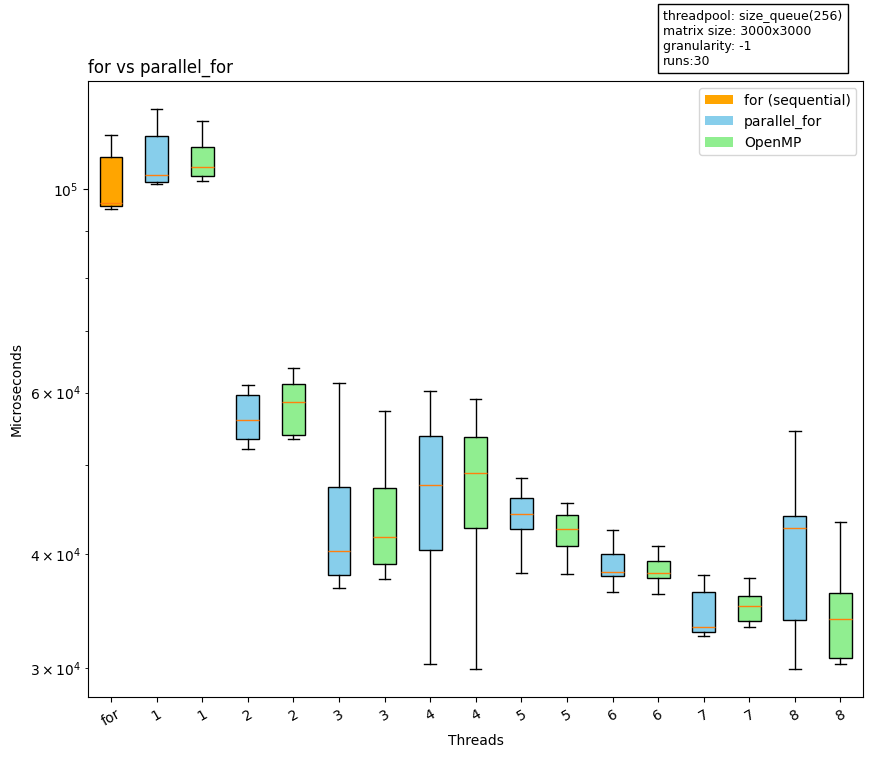

In [16]:
plot_boxplot(dati_for, dati_parallel,dati_for_open,"for vs parallel_for")


=== SPEEDUP VALUES ===
1 threads -> threadpool: 0.93 | OpenMP: 0.91
2 threads -> threadpool: 1.73 | OpenMP: 1.65
3 threads -> threadpool: 2.40 | OpenMP: 2.32
4 threads -> threadpool: 2.03 | OpenMP: 1.97
5 threads -> threadpool: 2.18 | OpenMP: 2.27
6 threads -> threadpool: 2.53 | OpenMP: 2.53
7 threads -> threadpool: 2.90 | OpenMP: 2.75
8 threads -> threadpool: 2.26 | OpenMP: 2.84



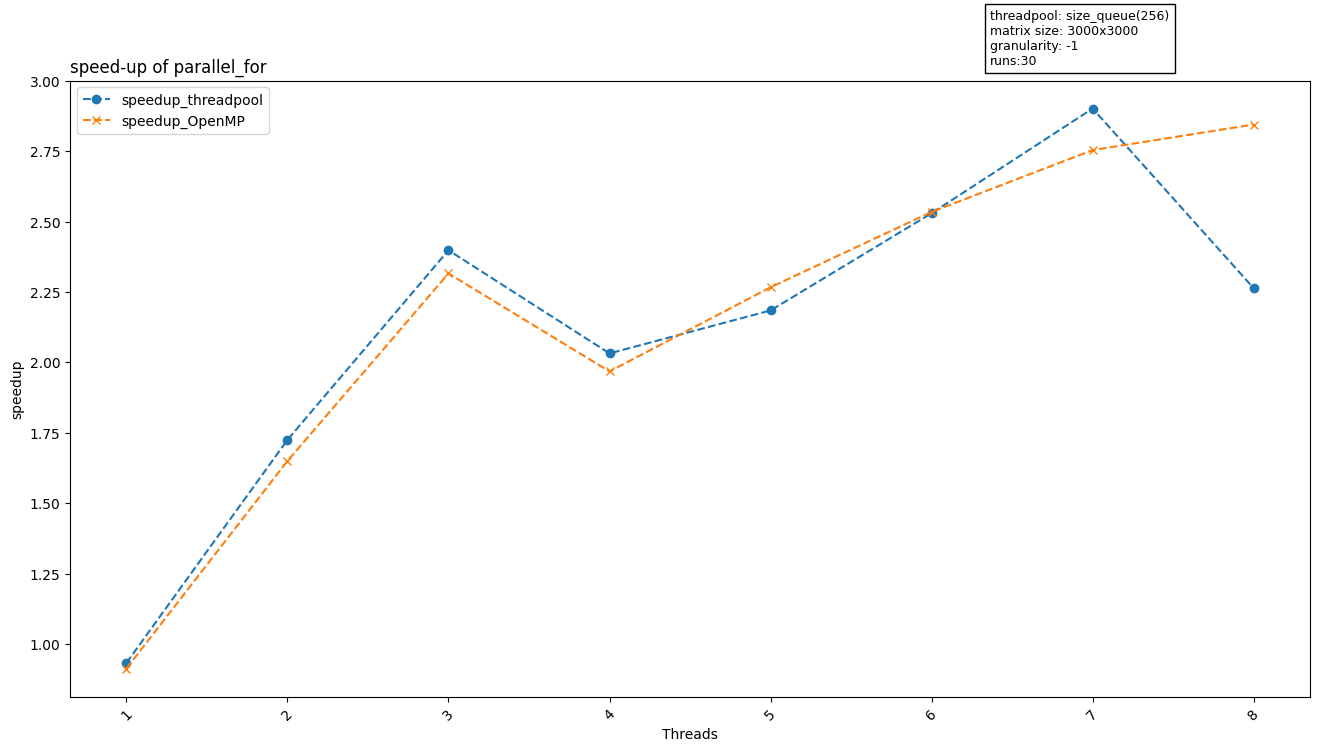

In [17]:
data_parallel = []
data_open = []
data_parallel.append(dati_for)
data_open.append(dati_for)
for i in range(len(n_threads)):
    data_parallel.append(dati_parallel[i])
    data_open.append(dati_for_open[i])

plot_speedup(data_parallel,data_open,"speed-up of parallel_for",n_threads)